In [83]:
import unidecode
import string
import random
import re

#all_characters = string.printable + 'Аunidecode.unidecodeаБбВвГгДдЕеЁёЖжЗзИиЙйКкЛлМмНнОоПпРрСсТтУуФфХхЦцЧчШшЩщЪъЫыЬьЭэЮюЯя'
#file = unidecode.unidecode(open('../../telegram_fetch/texts/maria_1ua').read())

file = (open('../../telegram_fetch/texts/maria_1ua').read())

all_characters = ''.join(sorted(list(set(file))))
n_characters = len(all_characters)
file_len = len(file)

print('file_len =', file_len)
print('all_characters=', all_characters)

file_len = 169675
all_characters= 
 !"$%&'()*+,-./0123456789:<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz«·»АБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяёєі​–—―“”€₽№☺⚡❤️👍😂😊😘😭🙃


In [84]:

chunk_len = 200

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

SG>  <PEER>
А есть лайфхаки как попасть в Японию подешевле? <MSG> товарняки москва-владивосток, а там на вёслах <MSG> зайцем. на yt есть целая серия роликов, где чувак все штаты на товарняках проехал и


In [105]:

import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [119]:

# Turn string into list of longs
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        try:
            tensor[c] = all_characters.index(string[c])
        except:
            print(string[c])
    return Variable(tensor)#.cuda()

print(char_tensor('abcDEF'))


tensor([59, 60, 61, 35, 36, 37])


In [120]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [121]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

## Training
A helper to print the amount of time passed:



In [128]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [129]:
def train(inp, target):
    hidden = decoder.init_hidden()#.cuda()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c].unsqueeze(0))

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len

In [131]:
n_epochs = 20000
print_every = 100
plot_every = 10
hidden_size = 256
n_layers = 1
lr = 0.001

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

#decoder.cuda()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 29s (100 0%) 1.7578]
WhTЕ❤9Вкатвам это <MSG>  <PEER>
<MSG>  <PEER>
&ма соше серо ний <MSG>  Срота энобо проволо по оды нави 

 56s (200 1%) 1.5028]
Whouyrugly:pNeror as7IЭvdПavodtia a_amiorl iasrc:ьntoest/: aottgs//tbaaur <MSG> <PEER>
 <MSG>  <PEER>
 

 24s (300 1%) 2.6258]
WhKе <MSG>  <PEER>
га <MSG>  <MSG>  <PEER>
Нестерте <MSG>  <MSG>  <PEER>
онто пристоввенно <MSG>  <MSG 

 50s (400 2%) 2.5653]
WhtsttMSG> ты ат проптиралам но с мецешиня <MSG>  <MSG> PEER>
Хем озверести <MSG>  <PEER>
Та выдотт, 2 

 17s (500 2%) 2.5742]
Whtuest hten att ar callcuinsim/t
4)  <MSG>  <PEER>
не сее в изпол <MSG> Нут с догерей с <MSG>  <PEER> 

 43s (600 3%) 1.6478]
Whtts/tts pooonyes/parni-ogs yanthitite aarss.co. ael sisely ponadte lent ticadpsone ar call <MSG> Ход 

 10s (700 3%) 1.7121]
WhcivZllii_pornave_vgrRana-narrenre.coonll <MSG>  <PEER>
 <MSG>  <PEER>
Да <MSG>  <MSG>  <PEER>
да <MS 

 37s (800 4%) 2.2058]
WhVhttes calll <MSG> ну <MSG>  <PEER>
Да <MSG> Холо забления у стажеть обой так арития на

KeyboardInterrupt: 

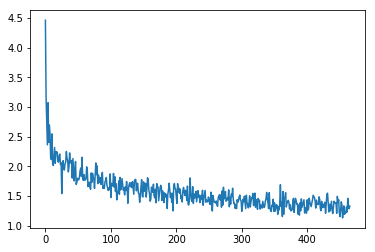

In [132]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [134]:
print(evaluate('Th', 1500, temperature=0.8))


Thgebs/Pshivaa-ith shoury sthoutlescall <MSG>  <PEER>
Я езд недал же покастенаю с люде? <MSG>  <PEER>
Вмерое <MSG> На круто <MSG>  <PEER>
Давай <MSG>  <PEER>
Так тоже как <MSG>  <PEER>
Ну понятно <MSG>  <PEER>
Ты таким меложно <MSG>  <PEER>
 <MSG>  <PEER>
На до уже взыклая <MSG>  <PEER>
У то что я не предпокорым <MSG>  <PEER>
5 как то что <MSG> Уже воставла дома на словом людьми от этом есть <MSG>  <PEER>
он сложно заправсть <MSG>  <PEER>
Я думаю что риска <MSG>  <PEER>
Но когда с невопрос <MSG>  <PEER>
Ты с как то давно <MSG>  <PEER>
Ага <MSG> Ака там особы все хорошо <MSG>  <PEER>
covin <PEER>
В родека <MSG>  <PEER>
А вочность это засемпал за себя <MSG>  <PEER>
не надо
на сложник <MSG>  <PEER>
Про как то же не с ним с обсываю что бы просто не уже с ним <MSG>  <PEER>
Я невести <MSG>  <PEER>
ты хорого там от бед сложно <MSG>  <PEER>
Да <MSG>  <PEER>
Не очень <MSG>  <PEER>
 <MSG>  <MSG>  <PEER>
Меньше минуть <MSG>  <PEER>
я не все дивать интерес <MSG>  <PEER>
Не я знаешь с РС(Я) <MSG> я